In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import glob
sns.set_style('whitegrid')
from skbio.diversity import beta_diversity
import numpy as np
from skbio.stats.distance import mantel
from skbio.stats.ordination import pcoa
import pandas as pd
from skbio.stats.distance import anosim
import os
from Bio import SeqIO
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

In [3]:
#export path
export_path = '/data4/human/candida_sampling/kallisto/kallisto_quant/abundance_files/analysis/'

# Importing Reference genes and annotations

In [4]:
parap_anno = {}
parap_genes = {}

anno_fh = "/groups/banfield/projects/human/candida_sampling/ref_datasets/C_parapsilosis_CDC317_current_orf_coding.fasta"
for record in SeqIO.parse(anno_fh, "fasta"):
    parap_anno[record.id] = record.description
    parap_genes[record.id] = record.seq
    
parap_anno_df = pd.DataFrame.from_dict(parap_anno, orient='index')
parap_genes_df = pd.DataFrame.from_dict(parap_genes, orient='index')

# Human Removed + Culture

In [5]:
hr_master_df = pd.read_csv('/groups/banfield/projects/human/candida_sampling/kallisto/kallisto_quant/abundance_files_HR/C1_006_012G1_RNA_abundance.tsv', sep='\t')
for file in glob.glob('/groups/banfield/projects/human/candida_sampling/kallisto/kallisto_quant/abundance_files_HR/*.tsv'):
    temp_df = pd.read_csv(file, sep='\t')
    hr_master_df[os.path.basename(file)] = temp_df['tpm']

In [6]:
hr_master_df = hr_master_df.drop('tpm', axis=1)
hr_master_df_cp = hr_master_df
hr_master_df_cp = hr_master_df_cp.drop('length', axis=1)
hr_master_df_cp = hr_master_df_cp.drop('eff_length', axis=1)
hr_master_df_cp = hr_master_df_cp.drop('est_counts', axis=1)
hr_master_df_cp = hr_master_df_cp.drop('C1_006_017G1_RNA_abundance.tsv', axis=1)
hr_master_df_cp = hr_master_df_cp.drop('C1_006_036G1_RNA_abundance.tsv', axis=1)

In [7]:
hr_master_df_cp = hr_master_df_cp.set_index('target_id')

/home/pwest/.pyenv/versions/3.8.2/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


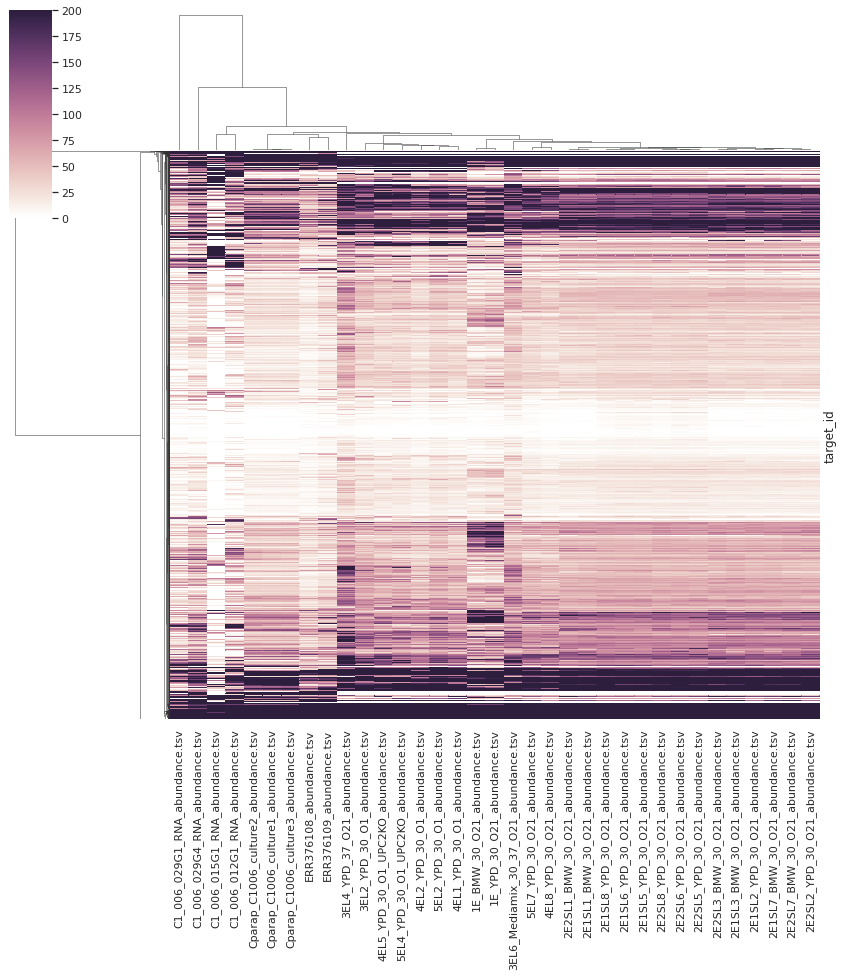

In [18]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#sns.palplot(sns.cubehelix_palette(8))
sns.clustermap(hr_master_df_cp, vmax=200, yticklabels=False, cmap=cmap)
plt.gcf().set_size_inches(12, 16)
plt.savefig('parapsilosis_exvivo_vs_invivo_heatmap.pdf')

In [10]:
multicopy_df = hr_master_df_cp.loc[['CPAR2_403900','CPAR2_104610']]

In [19]:
hr_master_df_cp.loc[['CPAR2_407500','CPAR2_104610']]

,2E1SL6_YPD_30_O21_abundance.tsv,4EL2_YPD_30_O1_abundance.tsv,Cparap_C1006_culture2_abundance.tsv,C1_006_029G1_RNA_abundance.tsv,2E1SL5_YPD_30_O21_abundance.tsv,C1_006_015G1_RNA_abundance.tsv,5EL2_YPD_30_O1_abundance.tsv,2E1SL2_YPD_30_O21_abundance.tsv,1E_BMW_30_O21_abundance.tsv,5EL7_YPD_30_O21_abundance.tsv,...,1E_YPD_30_O21_abundance.tsv,5EL4_YPD_30_O1_UPC2KO_abundance.tsv,2E1SL3_BMW_30_O21_abundance.tsv,2E1SL1_BMW_30_O21_abundance.tsv,4EL8_YPD_30_O21_abundance.tsv,2E2SL6_YPD_30_O21_abundance.tsv,2E2SL5_YPD_30_O21_abundance.tsv,Cparap_C1006_culture3_abundance.tsv,2E2SL2_YPD_30_O21_abundance.tsv,C1_006_029G4_RNA_abundance.tsv
target_id,,,,,,,,,,,,,,,,,,,,,
CPAR2_407500,3587.8300,3262.1800,3007.830,371.697,3482.1000,0.000,2547.9500,3285.7500,2432.4200,4269.6300,...,2271.5700,3731.2500,3113.720,3312.4700,5096.2400,3704.1200,3392.5700,3348.030,3592.2700,1535.520
CPAR2_104610,46.0683,16.1424,749.584,459.183,45.8559,761.929,13.9727,59.8855,78.3728,43.2902,...,78.0091,21.6942,55.327,62.7331,45.0498,47.6295,46.9328,714.467,56.6793,725.188


## Expression of cytochrome c between low and high oxygen culture conditions
#### significant difference in cytochrome c expression in situ vs culture. Hypothesized it may have been due to low oxygen levels in the gut

In [36]:
lowox = [col for col in hr_master_df_cp.columns if 'O1' in col]
highox = [col for col in hr_master_df_cp.columns if 'O21' in col]
allox = lowox + highox

In [37]:
allox_df = hr_master_df_cp[allox]

In [41]:
allox_df['target_id1'] = allox_df.index
allox_df = pd.melt(allox_df, id_vars=['target_id1'])

<ipython-input-41-30f5a9213462>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allox_df['target_id1'] = allox_df.index


In [43]:
allox_df = allox_df.rename(columns={'variable':'sample', 'value':'tpm'})

In [44]:
allox_df['lowox'] = [True if x in lowox else False for x in allox_df['sample']]

In [46]:
cyt_genes = ["CPAR2_407500", "CPAR2_207710", "CPAR2_602920", "CapafMp06", "CapafMp05", "CapafMp13"]

In [47]:
allox_df_cyt = allox_df[allox_df["target_id1"].isin(cyt_genes)]

In [50]:
allox_df_cyt

,target_id1,sample,tpm,lowox
820,CPAR2_207710,4EL2_YPD_30_O1_abundance.tsv,1675.36000,True
2451,CPAR2_407500,4EL2_YPD_30_O1_abundance.tsv,3262.18000,True
2719,CapafMp06,4EL2_YPD_30_O1_abundance.tsv,4.08938,True
3133,CapafMp05,4EL2_YPD_30_O1_abundance.tsv,4.88177,True
3961,CapafMp13,4EL2_YPD_30_O1_abundance.tsv,2.93334,True
...,...,...,...,...
149026,CPAR2_407500,2E2SL2_YPD_30_O21_abundance.tsv,3592.27000,False
149294,CapafMp06,2E2SL2_YPD_30_O21_abundance.tsv,16.16910,False
149708,CapafMp05,2E2SL2_YPD_30_O21_abundance.tsv,10.05600,False
150536,CapafMp13,2E2SL2_YPD_30_O21_abundance.tsv,7.98612,False


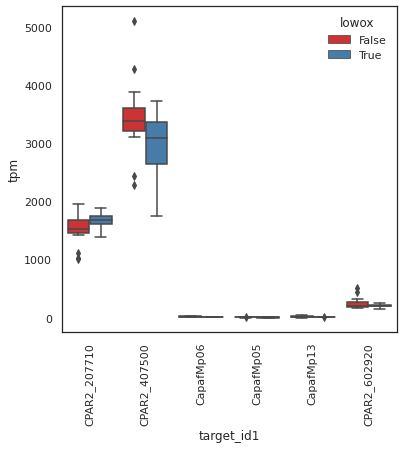

In [48]:
sns.set_style('white')
sns.set_palette("Set1")
ax = sns.boxplot(data=allox_df_cyt, x='target_id1', y='tpm', hue='lowox')
#ax = sns.swarmplot(data=db, x='sample', y='iRep')
plt.gcf().set_size_inches(6, 6)
plt.xticks(rotation=90)
plt.show()

In [59]:
for cyt_gene in cyt_genes:
    temp_df = allox_df_cyt[allox_df_cyt['target_id1'] == cyt_gene]
    print(ranksums(temp_df.loc[temp_df['lowox'] == True].tpm, temp_df.loc[temp_df['lowox'] == False].tpm))

RanksumsResult(statistic=-1.338877362790406, pvalue=0.18061060022349074)
RanksumsResult(statistic=1.460593486680443, pvalue=0.14412703481601521)
RanksumsResult(statistic=-0.06085806194501846, pvalue=0.9514722492227051)
RanksumsResult(statistic=-2.3126063539107014, pvalue=0.02074429187411625)
RanksumsResult(statistic=-1.9474579822405906, pvalue=0.05147985249045379)
RanksumsResult(statistic=-1.8865999202955723, pvalue=0.05921415750622669)


## Relative expression of RTA3 gene in situ and culture

In [12]:
multicopy_df['target_id1'] = multicopy_df.index
multicopy_df_long = pd.melt(multicopy_df, id_vars=['target_id1'])
#biofilm_long = pd.melt(extended_biofilm_regulators)

In [13]:
multicopy_df_long = multicopy_df_long.rename(columns={'variable':'sample', 'value':'tpm'})

In [14]:
multicopy_df_long['invivo'] = [True if x in ['C1_006_012G1_RNA_abundance.tsv','C1_006_015G1_RNA_abundance.tsv','C1_006_017G1_RNA_abundance.tsv','C1_006_029G1_RNA_abundance.tsv','C1_006_029G4_RNA_abundance.tsv','C1_006_036G1_RNA_abundance.tsv'] else False for x in multicopy_df_long['sample']]

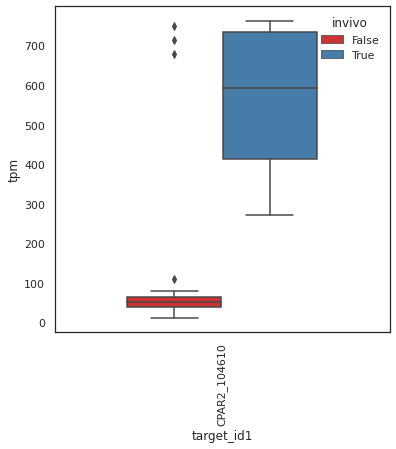

In [15]:
sns.set_style('white')
sns.set_palette("Set1")
#ax = sns.boxplot(data=db, x='antibiotics', y='iRep', hue='choanos')
ax = sns.boxplot(data=multicopy_df_long, x='target_id1', y='tpm', hue='invivo')
#ax = sns.swarmplot(data=db, x='sample', y='iRep')
plt.gcf().set_size_inches(6, 6)
plt.xticks(rotation=90)
plt.show()

In [16]:
from scipy.stats import ranksums
ranksums(multicopy_df_long.loc[multicopy_df_long['invivo'] == True].tpm, multicopy_df_long.loc[multicopy_df_long['invivo'] == False].tpm)

RanksumsResult(statistic=2.8516171605086695, pvalue=0.004349745332208783)

## RTA3 relative expression in situ and culture, C1_006 strain only

In [17]:
C106_samples = ['C1_006_012G1_RNA_abundance.tsv','C1_006_015G1_RNA_abundance.tsv','C1_006_017G1_RNA_abundance.tsv','C1_006_029G1_RNA_abundance.tsv','C1_006_029G4_RNA_abundance.tsv','C1_006_036G1_RNA_abundance.tsv','Cparap_C1006_culture1_abundance.tsv','Cparap_C1006_culture2_abundance.tsv','Cparap_C1006_culture3_abundance.tsv']
C106_multicopy_df_long = multicopy_df_long.loc[multicopy_df_long['sample'].isin(C106_samples)]

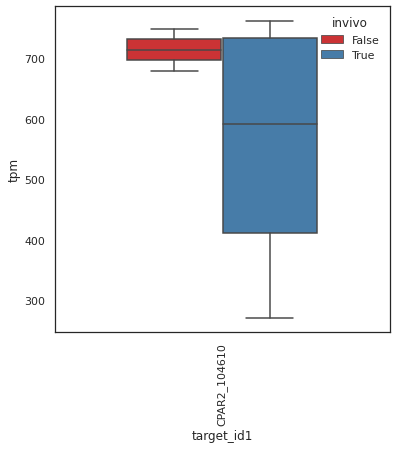

In [18]:
sns.set_style('white')
sns.set_palette("Set1")
#ax = sns.boxplot(data=db, x='antibiotics', y='iRep', hue='choanos')
ax = sns.boxplot(data=C106_multicopy_df_long, x='target_id1', y='tpm', hue='invivo')
#ax = sns.swarmplot(data=db, x='sample', y='iRep')
plt.gcf().set_size_inches(6, 6)
plt.xticks(rotation=90)
plt.show()

## Expression of biofilm regulators in situ vs culture

/home/pwest/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


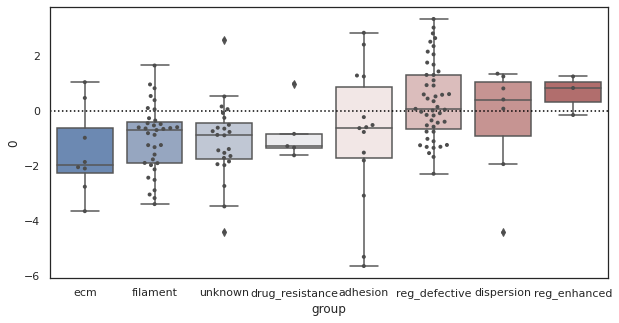

In [8]:
gene_dir = '/groups/banfield/projects/human/candida_sampling/candida_biofilm_genes/'

def parse_gene_list(directory, filename):
    fh = open(directory + filename)
    gene_dict = {}
    for line in fh:
        sline = line.strip().split()
        gene_dict[sline[1]] = sline[0]
    return gene_dict  

reg_defective_genes = parse_gene_list(gene_dir, 'regulators_defective.txt')
reg_enhanced_genes = parse_gene_list(gene_dir, 'regulators_enhanced.txt')
adhesion_genes = parse_gene_list(gene_dir, 'adhesion.txt')
dispersion_genes = parse_gene_list(gene_dir, 'dispersion.txt')
drug_resistance_genes = parse_gene_list(gene_dir, 'drug_resistance.txt')
ecm_genes = parse_gene_list(gene_dir, 'ecm.txt')
filament_genes = parse_gene_list(gene_dir, 'filamentation_cellwall.txt')
unknown_genes = parse_gene_list(gene_dir, 'unknown.txt')

def subset_df_from_genes(master_df, genes):
    new_df = master_df.loc[genes.keys()]
    new_df['target_id1'] = new_df.index
    new_df_long = pd.melt(new_df, id_vars=['target_id1'])
    new_df_long = new_df_long.rename(columns={'variable':'sample', 'value':'tpm'})
    new_df_long['invivo'] = [True if x in ['C1_006_012G1_RNA_abundance.tsv','C1_006_015G1_RNA_abundance.tsv','C1_006_017G1_RNA_abundance.tsv','C1_006_029G1_RNA_abundance.tsv','C1_006_029G4_RNA_abundance.tsv','C1_006_036G1_RNA_abundance.tsv'] else False for x in new_df_long['sample']]
    return new_df_long

reg_defective = subset_df_from_genes(hr_master_df_cp, reg_defective_genes)
reg_enhanced = subset_df_from_genes(hr_master_df_cp, reg_enhanced_genes)
adhesion = subset_df_from_genes(hr_master_df_cp, adhesion_genes)
dispersion = subset_df_from_genes(hr_master_df_cp, dispersion_genes)
drug_resistance = subset_df_from_genes(hr_master_df_cp, drug_resistance_genes)
ecm = subset_df_from_genes(hr_master_df_cp, ecm_genes)
filament = subset_df_from_genes(hr_master_df_cp, filament_genes)
unknown = subset_df_from_genes(hr_master_df_cp, unknown_genes)

def plot_boxplot(df, plt_title):
    sns.set_style('white')
    sns.set_palette("Set1")
    #ax = sns.boxplot(data=db, x='antibiotics', y='iRep', hue='choanos')
    ax = sns.boxplot(data=df, x='target_id1', y='tpm', hue='invivo').set_title(plt_title)
    #ax = sns.swarmplot(data=db, x='sample', y='iRep')
    plt.gcf().set_size_inches(10, 6)
    plt.show()
    
invivo_log2 = pd.DataFrame(np.log2((hr_master_df_cp[['C1_006_012G1_RNA_abundance.tsv','C1_006_015G1_RNA_abundance.tsv','C1_006_029G1_RNA_abundance.tsv','C1_006_029G4_RNA_abundance.tsv']].mean(axis=1))/(hr_master_df_cp.drop(['C1_006_012G1_RNA_abundance.tsv','C1_006_015G1_RNA_abundance.tsv','C1_006_029G1_RNA_abundance.tsv','C1_006_029G4_RNA_abundance.tsv'], axis=1).mean(axis=1))))
invivo_log2['group'] = 'null'

invivo_log2.at[reg_defective_genes.keys(), 'group'] = 'reg_defective'
invivo_log2.at[reg_enhanced_genes.keys(), 'group'] = 'reg_enhanced'
invivo_log2.at[adhesion_genes.keys(), 'group'] = 'adhesion'
invivo_log2.at[dispersion_genes.keys(), 'group'] = 'dispersion'
invivo_log2.at[drug_resistance_genes.keys(), 'group'] = 'drug_resistance'
invivo_log2.at[ecm_genes.keys(), 'group'] = 'ecm'
invivo_log2.at[filament_genes.keys(), 'group'] = 'filament'
invivo_log2.at[unknown_genes.keys(), 'group'] = 'unknown'

invivo_log2 = invivo_log2.rename(columns={'tpm':'log2'})
invivo_log2 = invivo_log2[invivo_log2.group != 'null']

sns.set_style('white')
sns.set_palette("vlag")
#ax = sns.boxplot(data=db, x='antibiotics', y='iRep', hue='choanos')
ax = sns.boxplot(data=invivo_log2, x='group', y=0, palette="vlag", order=['ecm','filament','unknown','drug_resistance','adhesion','reg_defective','dispersion','reg_enhanced'])
sns.swarmplot(x="group", y=0, data=invivo_log2, size=4, color=".3", linewidth=0, order=['ecm','filament','unknown','drug_resistance','adhesion','reg_defective','dispersion','reg_enhanced'])
plt.axhline(y=0, linestyle=':', color='black')
plt.gcf().set_size_inches(10, 5)
plt.savefig('parapsilosis_exvivo_vs_invivo_biofilm_boxplots.pdf')
plt.show()

# High density SNP genes

In [ ]:
# High density SNP genes from C1_006_012G1

In [69]:
snp_fh = open('/data4/human/candida_sampling/kallisto/kallisto_quant/abundance_files_HR/high_density_SNP_genes')

snp_genes = []
for line in snp_fh:
    line = line.strip()
    snp_genes.append(line)


In [70]:
snp_gene_df = hr_master_df_cp.loc[snp_genes]

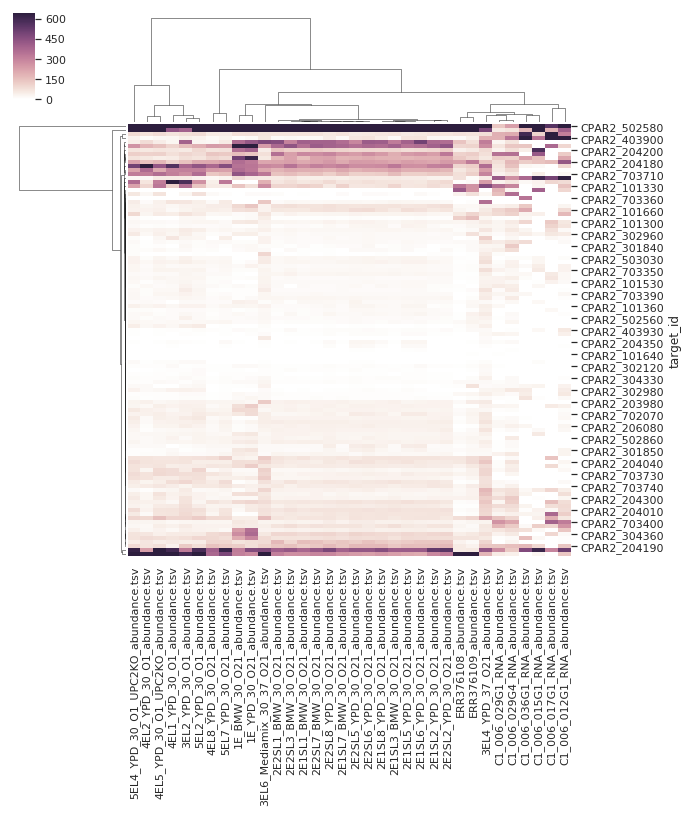

In [22]:
cg = sns.clustermap(snp_gene_df, robust=True, cmap=cmap)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.gcf().set_size_inches(10, 10)

In [71]:
snp_gene_df['target_id1'] = snp_gene_df.index
snp_gene_df_long = pd.melt(snp_gene_df, id_vars=['target_id1'])
#biofilm_long = pd.melt(extended_biofilm_regulators)

In [72]:
snp_gene_df_long = snp_gene_df_long.rename(columns={'variable':'sample', 'value':'tpm'})

In [73]:
snp_gene_df_long['invivo'] = [True if x in ['C1_006_012G1_RNA_abundance.tsv','C1_006_015G1_RNA_abundance.tsv','C1_006_017G1_RNA_abundance.tsv','C1_006_029G1_RNA_abundance.tsv','C1_006_029G4_RNA_abundance.tsv','C1_006_036G1_RNA_abundance.tsv'] else False for x in snp_gene_df_long['sample']]

In [74]:
snp_gene_df['invivo_avg'] = snp_gene_df[['C1_006_012G1_RNA_abundance.tsv', 'C1_006_015G1_RNA_abundance.tsv', 'C1_006_029G1_RNA_abundance.tsv', 'C1_006_029G4_RNA_abundance.tsv']].mean(axis=1)
snp_gene_df['exvivo_avg'] = snp_gene_df.drop( ['C1_006_012G1_RNA_abundance.tsv', 'C1_006_015G1_RNA_abundance.tsv', 'C1_006_029G1_RNA_abundance.tsv', 'C1_006_029G4_RNA_abundance.tsv'], axis=1).mean(axis=1)


In [75]:
snp_gene_df['in_vs_ex_log2'] = np.log2 (snp_gene_df['invivo_avg']/snp_gene_df['exvivo_avg'])

/home/pwest/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [76]:
snp_gene_df = snp_gene_df.dropna()
snp_gene_df = snp_gene_df[~snp_gene_df.isin([np.nan, np.inf, -np.inf]).any(1)]

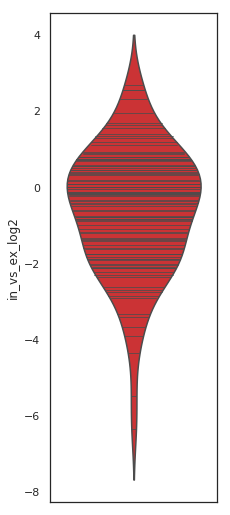

In [161]:
sns.violinplot(snp_gene_df['in_vs_ex_log2'],inner="stick",orient='v')
plt.gcf().set_size_inches(3,9)

# Gene categories visualization

In [25]:
modules_fh = open('/home/pwest/databases/KEGG_modules/ko_pathway_modules.flat.filtered.tab')
KO2mod = {}
for line in modules_fh:
    sline = line.strip().split('\t')
    KO2mod[sline[0]] = sline[6].split('; ')

In [26]:
parap_all_fh = open('/data4/human/candida_sampling/ref_datasets/kofamsearch/C_parapsilosis_CDC317_current_orf_trans_all.fasta.ko.sig')
parap_KOs = {}
for line in parap_all_fh:
    sline = line.strip().split()
    if sline[0] not in parap_KOs:
        parap_KOs[sline[0]] = []
    parap_KOs[sline[0]].append(sline[1])

In [27]:
def geneKO_to_mod(gene2KO, KO2mod):
    gene_mod = {}
    for gene in gene2KO:
        gene_mod[gene] = []
        for KO in gene2KO[gene]:
            if KO in KO2mod:
                for mod in KO2mod[KO]:
                   gene_mod[gene].append(mod)
            else:
                gene_mod[gene].append('None')
                
    #gene_mod2 = {}
    #for gene in gene_mod:
    #    gene_mod2[gene] = gene_mod[gene][0]
    return gene_mod

In [28]:
geneKOs = geneKO_to_mod(parap_KOs, KO2mod)

In [29]:
geneKOs_df = pd.DataFrame.from_dict(geneKOs, orient='index')

In [30]:
KO_invivo_log2 = invivo_log2.merge(geneKOs_df, left_index=True, right_index=True)

In [32]:
mod_invivo_log2 = KO_invivo_log2.groupby('0_y', as_index=False)['0_x'].mean()

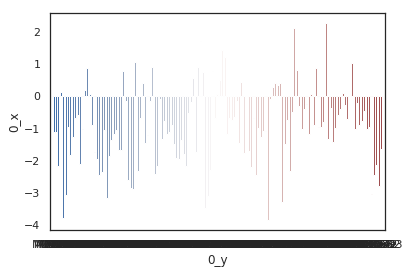

In [202]:
ax = sns.barplot(x="0_y", y="0_x", data=mod_invivo_log2, palette="vlag")

In [61]:
mod_invivo_log2_sorted = mod_invivo_log2.sort_values(by="0_x", ascending=False)

mod_invivo_log2_sorted = mod_invivo_log2_sorted.replace([np.inf, -np.inf], np.nan).dropna()


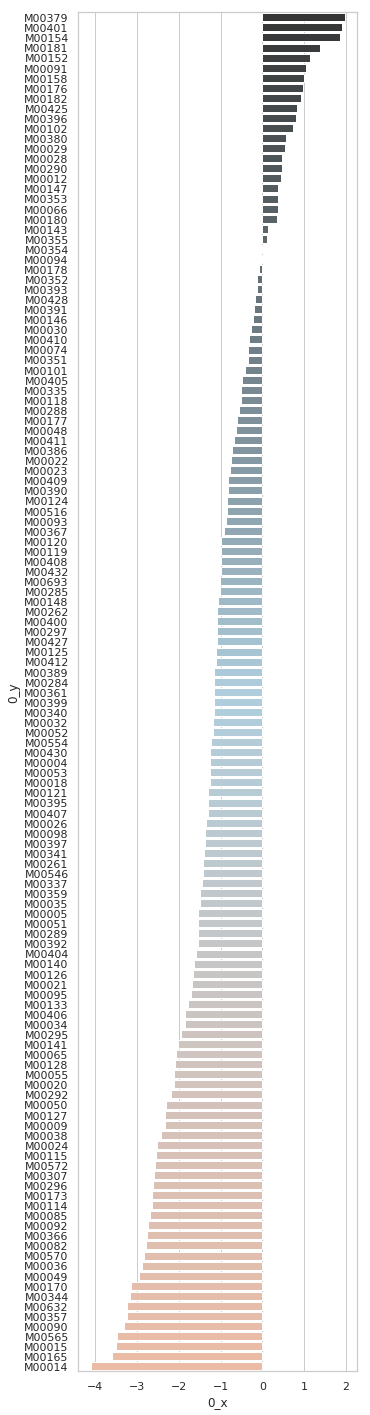

In [63]:
ax = sns.barplot(x="0_x", y="0_y", data=mod_invivo_log2_sorted, palette="RdBu_d")
plt.gcf().set_size_inches(5, 25)
plt.savefig('parapsilosis_exvivo_vs_invivo_KEGG_mod_barplot.pdf')

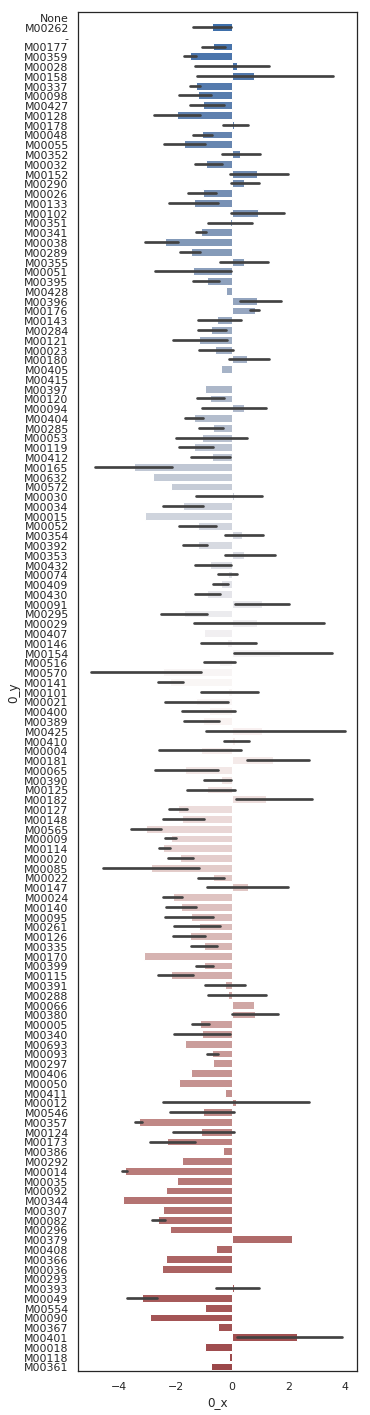

In [222]:
sns.barplot(data=KO_invivo_log2, x='0_x', y='0_y', palette="vlag")
plt.gcf().set_size_inches(5, 25)

In [65]:
ribo_genes =  KO_invivo_log2[KO_invivo_log2['0_y']=='M00177']
#gapminder_2002 = KO_invivo_log2[is_2002]

In [69]:
parapKOs_df = pd.DataFrame.from_dict(parap_KOs, orient='index')
riboKO_invivo_log2 = ribo_genes.merge(parapKOs_df, left_index=True, right_index=True)

In [71]:
riboKO_invivo_log2_avg = riboKO_invivo_log2.groupby(0, as_index=False)['0_x'].mean()

In [73]:
riboKO_invivo_log2_avg_sorted = riboKO_invivo_log2_avg.sort_values(by="0_x", ascending=False)
riboKO_invivo_log2_avg_sorted = riboKO_invivo_log2_avg_sorted.replace([np.inf, -np.inf], np.nan).dropna()


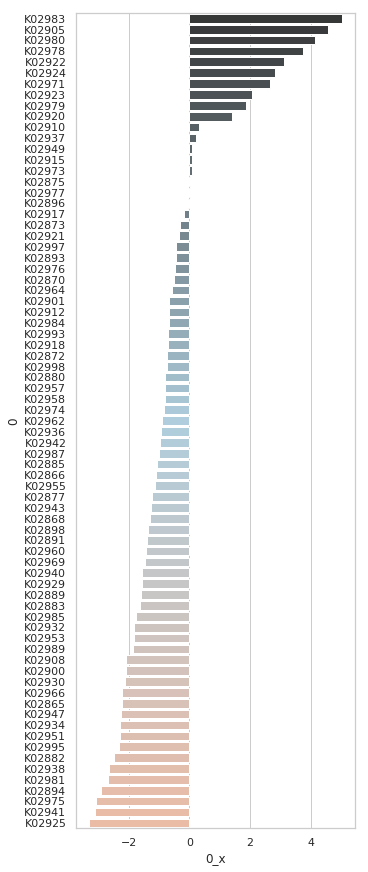

In [79]:
ax = sns.barplot(x="0_x", y=0, data=riboKO_invivo_log2_avg_sorted, palette="RdBu_d")
plt.gcf().set_size_inches(5, 15)
plt.savefig('parapsilosis_ribo_genes_barplot.pdf')